In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [146]:
df_cleaned = pd.read_csv(r"/content/cleaned_smartphone_data.csv")

In [147]:
df_cleaned.head()

,Brand,Model,Front Camera (MP),Have Pop-Up Front Camera,Rear Camera (MP),Processor,Battery Capacity (mAh),Display Size (inches),RAM (GB),ROM (GB),Price (Rs.)
0,SAMSUNG,S24 Ultra,40.0,0,108.0,Exynos,5000,6.80,8.0,128,101515
1,SAMSUNG,S24 Plus,10.0,0,50.0,Exynos,4500,6.60,8.0,128,57575
2,SAMSUNG,Zero,32.0,0,12.0,Snapdragon 888 5G,4500,6.41,8.0,256,34242
3,SAMSUNG,S24,10.0,0,50.0,Exynos,3700,6.10,8.0,128,75757
4,SAMSUNG,A05s,5.0,0,50.0,Exynos,5000,6.50,4.0,64,7575


### APPLYING FINAL ONE-HOT ENCODING TO CLEANED DATASET TO CONVERT THE REMAINING CATEGORICAL DATA TO NOMINAL DATASET

In [148]:
df_encod = df_cleaned.copy()

object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print(len(object_features))
print(object_features)

3
['Brand', 'Model', 'Processor']


In [149]:
print("Shape of df before encoding: ", df_encod.shape)

df_encod = pd.get_dummies(df_encod,
               columns=object_features,
               prefix = object_features,
               drop_first = True).astype(int)

print("Shape of df after encoding: ", df_encod.shape)

Shape of df before encoding:  (1256, 11)
Shape of df after encoding:  (1256, 1388)


In [150]:
df = df_encod.copy()

## Splitting the dataset into X and Y for training and testing

In [151]:
X = df.drop(columns = "Price (Rs.)")
y = df["Price (Rs.)"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Feature Scaling

In [153]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Training Multiple Models - Pre-requisites

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [155]:
# Function to get metrics
def get_metrics(y_test, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE, 3)}, 'RMSE': {round(RMSE, 3)}, 'MAE': {round(MAE, 3)}, 'R2': {round(R2, 3)}]")

## Training Multiple Models

In [156]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [157]:
# Training Ridge and Lasso Regression
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.283e+08, tolerance: 4.501e+07
  model = cd_fast.enet_coordinate_descent(


### Scores after models are trained

In [158]:
# Get metrics for each model

get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")

Ridge : ['MSE': 149925214.229, 'RMSE': 12244.395, 'MAE': 8195.716, 'R2': 0.725]
Lasso : ['MSE': 152936824.274, 'RMSE': 12366.763, 'MAE': 7071.383, 'R2': 0.72]


In [159]:
# # Polynomial Regression
# poly = PolynomialFeatures(2)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# poly_r = LinearRegression().fit(X_train_poly, y_train)
# y_pred_poly = poly_r.predict(X_test_poly)

In [160]:
# get_metrics(y_test, y_pred_poly, "PolynomialFeatures")

In [161]:
# Support Vector Regression
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [162]:
get_metrics(y_test, y_pred_svr, "SVR")

SVR : ['MSE': 597654284.024, 'RMSE': 24446.969, 'MAE': 14849.055, 'R2': -0.095]


In [163]:
# KNeighbors Regressor
knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

In [164]:
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")

KNeighborsRegressor : ['MSE': 491608995.693, 'RMSE': 22172.257, 'MAE': 14017.889, 'R2': 0.099]


In [165]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [166]:
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")

DecisionTreeRegressor : ['MSE': 92435976.825, 'RMSE': 9614.363, 'MAE': 5988.968, 'R2': 0.831]


In [167]:
# Random Forest Regressor
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [168]:
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")

RandomForestRegressor : ['MSE': 63628866.694, 'RMSE': 7976.77, 'MAE': 5097.326, 'R2': 0.883]


In [169]:
# XGBoost Regressor
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [170]:
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

XGBRegressor : ['MSE': 51939006.055, 'RMSE': 7206.872, 'MAE': 4799.536, 'R2': 0.905]


In [171]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
get_metrics(y_test, y_pred_gbr, "GradientBoostingRegressor")

GradientBoostingRegressor : ['MSE': 69175491.008, 'RMSE': 8317.18, 'MAE': 5958.73, 'R2': 0.873]


In [172]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor().fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)
get_metrics(y_test, y_pred_abr, "AdaBoostRegressor")

AdaBoostRegressor : ['MSE': 302536253.142, 'RMSE': 17393.569, 'MAE': 14792.422, 'R2': 0.446]


In [173]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor().fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
get_metrics(y_test, y_pred_etr, "ExtraTreesRegressor")

ExtraTreesRegressor : ['MSE': 60433619.747, 'RMSE': 7773.906, 'MAE': 4790.43, 'R2': 0.889]


In [174]:
# LightGBM Regressor
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor().fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)
get_metrics(y_test, y_pred_lgbmr, "LGBMRegressor")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 1004, number of used features: 18
[LightGBM] [Info] Start training from score 26384.005976
LGBMRegressor : ['MSE': 115096648.256, 'RMSE': 10728.311, 'MAE': 6373.899, 'R2': 0.789]


In [175]:
# CatBoost Regressor
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=0).fit(X_train, y_train)
y_pred_cbr = cbr.predict(X_test)
get_metrics(y_test, y_pred_cbr, "CatBoostRegressor")

CatBoostRegressor : ['MSE': 58876922.641, 'RMSE': 7673.13, 'MAE': 4880.341, 'R2': 0.892]


In [176]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(X_train, y_train)
y_pred_en = en.predict(X_test)
get_metrics(y_test, y_pred_en, "ElasticNet")

ElasticNet : ['MSE': 159428587.32, 'RMSE': 12626.503, 'MAE': 8526.763, 'R2': 0.708]


In [177]:
# Huber Regressor
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor().fit(X_train, y_train)
y_pred_hr = hr.predict(X_test)
get_metrics(y_test, y_pred_hr, "HuberRegressor")

HuberRegressor : ['MSE': 142509631.132, 'RMSE': 11937.74, 'MAE': 7933.562, 'R2': 0.739]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Best Model for this case: XGBRegressor with 'R2': 0.905

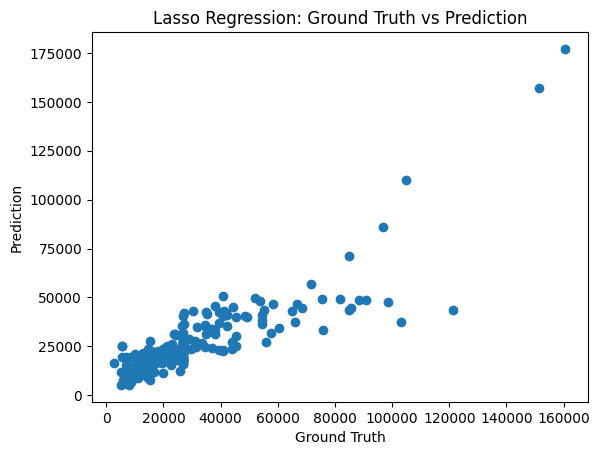

In [178]:
plt.scatter(y_test, y_pred_lar)
plt.title("Lasso Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

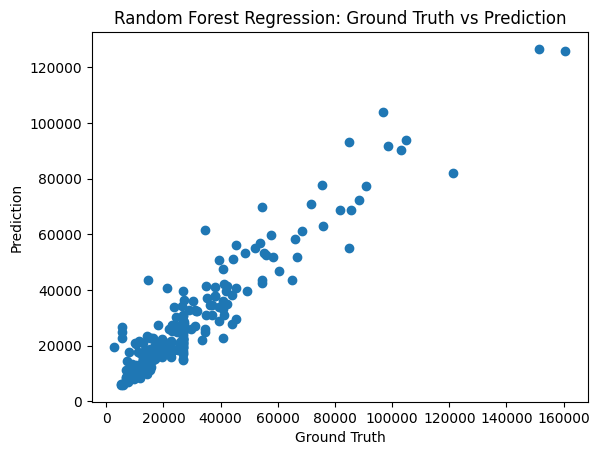

In [179]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

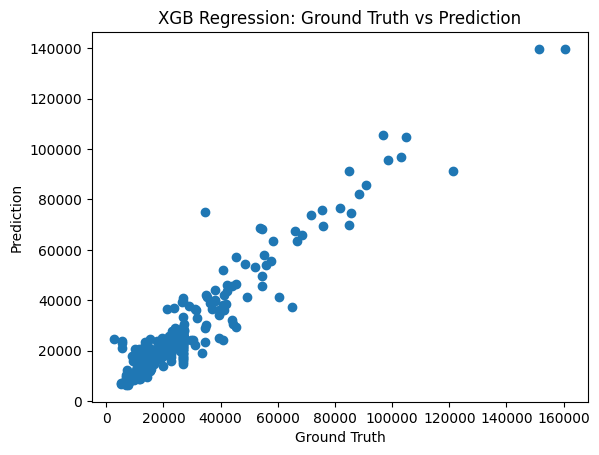

In [180]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGB Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()